# FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

## Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 


## Part 1: Data Preparation and Exploration

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools


In [2]:
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M'))
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [27]:
df.shape

(7588, 2)

## check for datatype

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


## summary statistics


In [29]:
df.describe()

,date,Ex_rate
count,7588,7588.000000
mean,2000-05-21 12:00:00,0.776974
min,1990-01-01 00:00:00,0.483297
25%,1995-03-12 18:00:00,0.701422
50%,2000-05-21 12:00:00,0.761377
75%,2005-07-31 06:00:00,0.873477
max,2010-10-10 00:00:00,1.102536
std,NaN,0.136620


## Data Preprocessing

### check for missing values

In [31]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

### check for duplicates

In [33]:
df[df.duplicated()]

,date,Ex_rate


## 	Initial Exploration

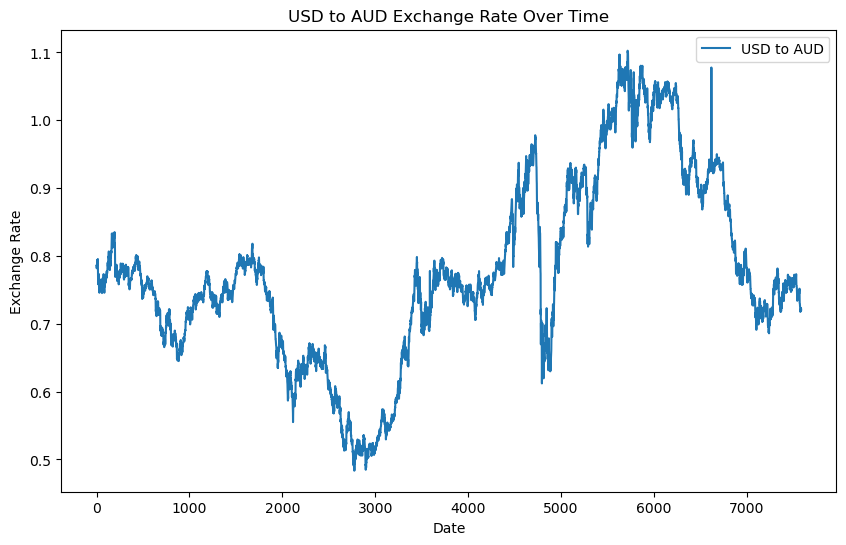

In [3]:
# Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Part 2: Model Building - ARIMA

### 1. Parameter Selection for ARIMA

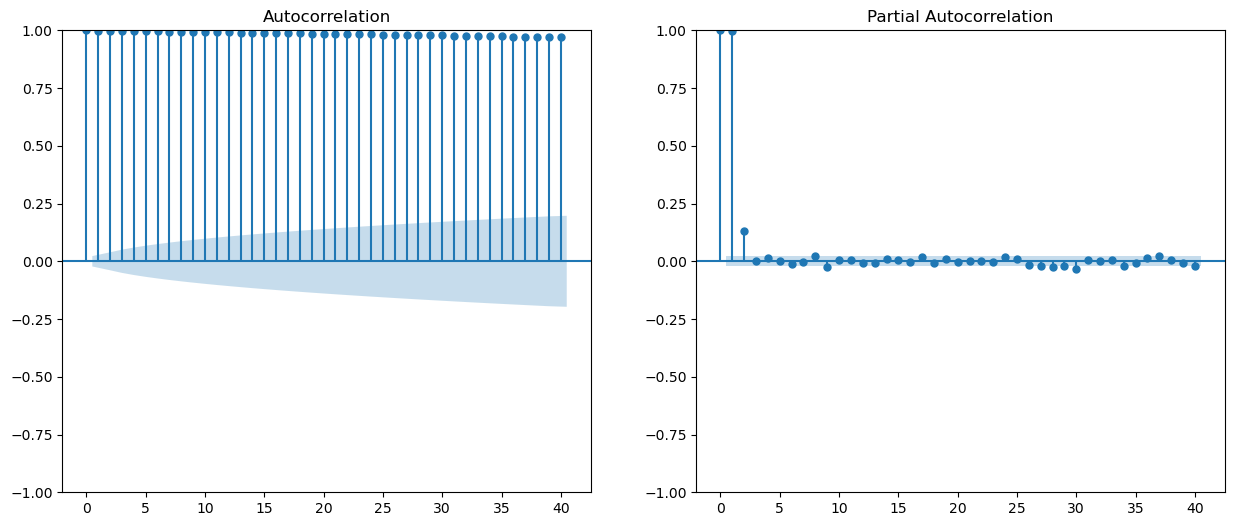

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(df['Ex_rate'], lags=40, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=40, ax=axes[1])
plt.show()

###  model building

In [34]:
def evaluate_arima_model(X, arima_order):
    model = ARIMA(X, order=arima_order)
    model_fit = model.fit()
    return model_fit.aic

In [6]:
# Function to perform grid search for ARIMA parameters
def grid_search_arima(data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            aic = evaluate_arima_model(data, (p, d, q))
            if aic < best_score:
                best_score, best_cfg = aic, (p, d, q)
            print(f"ARIMA{(p,d,q)} AIC={aic}")
        except:
            continue
    return best_cfg

In [7]:
# Define the p, d, q values 
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)


In [8]:
# Perform grid search for ARIMA
best_arima_order = grid_search_arima(df['Ex_rate'], p_values, d_values, q_values)
print(f"Best ARIMA order: {best_arima_order}")

# Fit the best ARIMA model
best_arima_model = ARIMA(df['Ex_rate'], order=best_arima_order)
arima_result = best_arima_model.fit()
print(arima_result.summary())


ARIMA(0, 0, 0) AIC=-8671.758441060432
ARIMA(0, 0, 1) AIC=-18651.980143971414
ARIMA(0, 0, 2) AIC=-26735.825597358795
ARIMA(0, 1, 0) AIC=-55974.19536739163
ARIMA(0, 1, 1) AIC=-56102.75341298782
ARIMA(0, 1, 2) AIC=-56101.86424502049
ARIMA(0, 2, 0) AIC=-49771.25917977956
ARIMA(0, 2, 1) AIC=-55944.872647422766


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 2, 2) AIC=-56075.96087738547
ARIMA(1, 0, 0) AIC=-55975.96069170833
ARIMA(1, 0, 1) AIC=-56103.563289300306
ARIMA(1, 0, 2) AIC=-56102.748781613074
ARIMA(1, 1, 0) AIC=-56104.318870183706
ARIMA(1, 1, 1) AIC=-56102.32167281933
ARIMA(1, 1, 2) AIC=-56101.590992949365
ARIMA(1, 2, 0) AIC=-52691.674330929214


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1) AIC=-56077.10297824242
ARIMA(1, 2, 2) AIC=-55981.30821574375
ARIMA(2, 0, 0) AIC=-56105.218298789405
ARIMA(2, 0, 1) AIC=-56103.21873325926
ARIMA(2, 0, 2) AIC=-56102.43066532705
ARIMA(2, 1, 0) AIC=-56102.32100849208
ARIMA(2, 1, 1) AIC=-56100.31587556675
ARIMA(2, 1, 2) AIC=-56100.13532997609
ARIMA(2, 2, 0) AIC=-53686.61329458361


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1) AIC=-56075.13258652699


C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 2) AIC=-56071.09641072807
Best ARIMA order: (2, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Wed, 29 May 2024   AIC                         -56105.218
Time:                        16:30:57   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.86

In [9]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 0, 0)   Log Likelihood               28056.609
Date:                Wed, 29 May 2024   AIC                         -56105.218
Time:                        16:31:31   BIC                         -56077.481
Sample:                             0   HQIC                        -56095.699
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7770      0.088      8.850      0.000       0.605       0.949
ar.L1          0.8682      0.002    397.265      0.000       0.864       0.872
ar.L2          0.1310      0.002     55.929      0.000       0.126       0.136
sigma2      3.594e-05   1.02e-07    350.716      0.000    3.57e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2869930.11
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3. Diagnostics

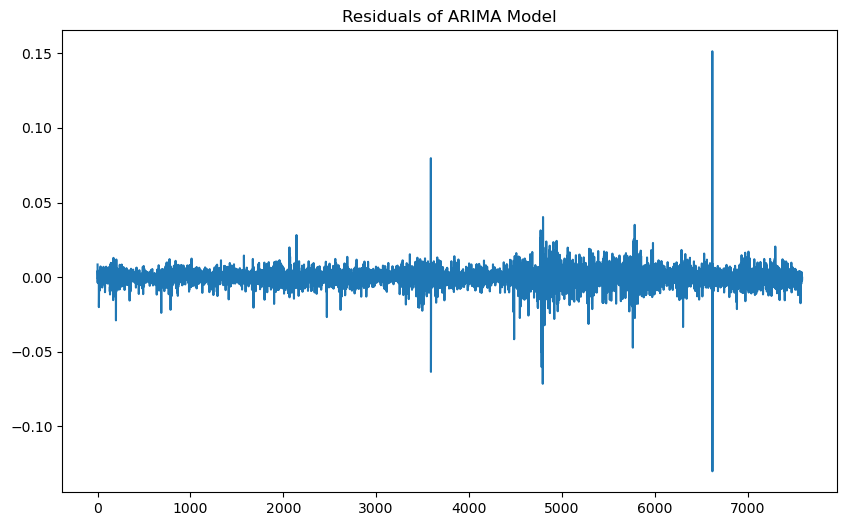

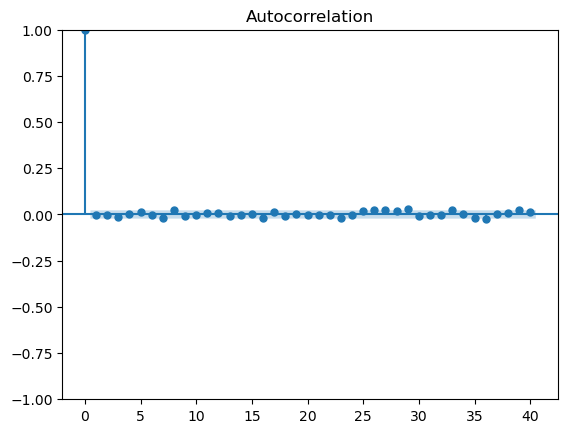

In [39]:
# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Check residuals' ACF
plot_acf(residuals, lags=40)
plt.show()

### Forecast


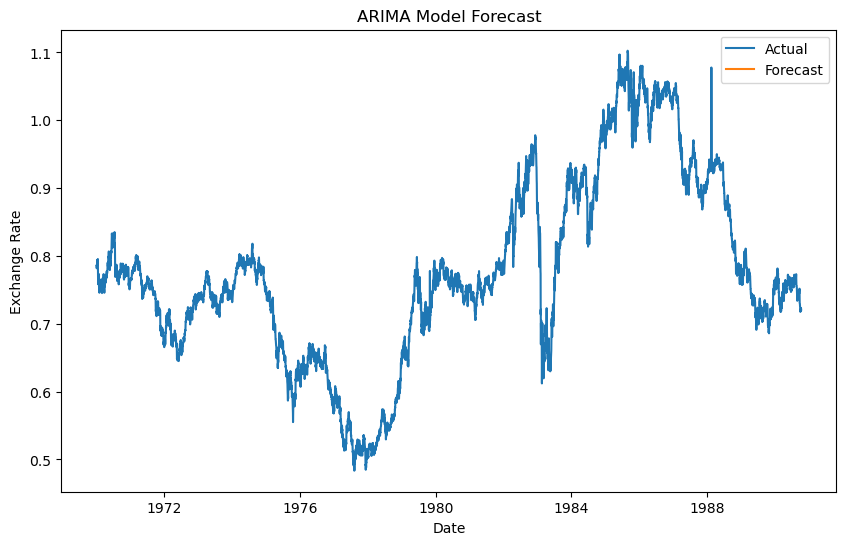

In [41]:
forecast = arima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1], periods=30, freq='D')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_series, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

## Part 3: Model Building - Exponential Smoothing

In [35]:
def evaluate_es_model(X, trend, seasonal, seasonal_periods):
    model = ExponentialSmoothing(X, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    return model_fit.aic


In [11]:
# Function to perform grid search for Exponential Smoothing parameters
def grid_search_es(data, trends, seasonals, seasonal_periods):
    best_score, best_cfg = float("inf"), None
    for trend, seasonal in itertools.product(trends, seasonals):
        try:
            aic = evaluate_es_model(data, trend, seasonal, seasonal_periods)
            if aic < best_score:
                best_score, best_cfg = aic, (trend, seasonal, seasonal_periods)
            print(f"Exponential Smoothing {trend}-{seasonal}-{seasonal_periods} AIC={aic}")
        except:
            continue
    return best_cfg


In [12]:
# Define the trend and seasonal values to try
trends = ['add', 'mul', None]
seasonals = ['add', 'mul', None]
seasonal_periods = 12  # Monthly seasonality, adjust as needed


In [13]:
# Perform grid search for Exponential Smoothing
best_es_cfg = grid_search_es(df['Ex_rate'], trends, seasonals, seasonal_periods)
print(f"Best Exponential Smoothing config: {best_es_cfg}")


Exponential Smoothing add-add-12 AIC=-77624.61073082773
Exponential Smoothing add-mul-12 AIC=-77624.54531332864
Exponential Smoothing add-None-12 AIC=-77641.00932749578
Exponential Smoothing mul-add-12 AIC=-77624.75600964711
Exponential Smoothing mul-mul-12 AIC=-77624.7077188159
Exponential Smoothing mul-None-12 AIC=-77641.16854393118
Exponential Smoothing None-add-12 AIC=-77628.55993816568
Exponential Smoothing None-mul-12 AIC=-77628.5276952004
Exponential Smoothing None-None-12 AIC=-77644.98075015451
Best Exponential Smoothing config: (None, None, 12)


In [15]:
# Fit the best Exponential Smoothing model
best_es_model = ExponentialSmoothing(df['Ex_rate'], trend=best_es_cfg[0], seasonal=best_es_cfg[1], seasonal_periods=best_es_cfg[2])
es_result = best_es_model.fit()
es_result.summary()


Dep. Variable:,Ex_rate,No. Observations:,7588
Model:,ExponentialSmoothing,SSE,0.273
Optimized:,True,AIC,-77644.981
Trend:,None,BIC,-77631.112
Seasonal:,None,AICC,-77644.975
Seasonal Periods:,None,Date:,"Wed, 29 May 2024"
Box-Cox:,False,Time:,16:33:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8687830,alpha,True
initial_level,0.7851417,l.0,True


### Forecasting and evaluation


In [47]:
forecast_steps = 30
arima_forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]
arima_forecast_series = pd.Series(arima_forecast.predicted_mean, index=forecast_index)
arima_forecast_series

1970-01-02 00:00:00.000007587   NaN
1970-01-03 00:00:00.000007587   NaN
1970-01-04 00:00:00.000007587   NaN
1970-01-05 00:00:00.000007587   NaN
1970-01-06 00:00:00.000007587   NaN
1970-01-07 00:00:00.000007587   NaN
1970-01-08 00:00:00.000007587   NaN
1970-01-09 00:00:00.000007587   NaN
1970-01-10 00:00:00.000007587   NaN
1970-01-11 00:00:00.000007587   NaN
1970-01-12 00:00:00.000007587   NaN
1970-01-13 00:00:00.000007587   NaN
1970-01-14 00:00:00.000007587   NaN
1970-01-15 00:00:00.000007587   NaN
1970-01-16 00:00:00.000007587   NaN
1970-01-17 00:00:00.000007587   NaN
1970-01-18 00:00:00.000007587   NaN
1970-01-19 00:00:00.000007587   NaN
1970-01-20 00:00:00.000007587   NaN
1970-01-21 00:00:00.000007587   NaN
1970-01-22 00:00:00.000007587   NaN
1970-01-23 00:00:00.000007587   NaN
1970-01-24 00:00:00.000007587   NaN
1970-01-25 00:00:00.000007587   NaN
1970-01-26 00:00:00.000007587   NaN
1970-01-27 00:00:00.000007587   NaN
1970-01-28 00:00:00.000007587   NaN
1970-01-29 00:00:00.00000758

In [46]:
es_forecast = es_result.forecast(steps=forecast_steps)
es_forecast_series = pd.Series(es_forecast, index=forecast_index)
es_forecast_series

1970-01-02 00:00:00.000007587   NaN
1970-01-03 00:00:00.000007587   NaN
1970-01-04 00:00:00.000007587   NaN
1970-01-05 00:00:00.000007587   NaN
1970-01-06 00:00:00.000007587   NaN
1970-01-07 00:00:00.000007587   NaN
1970-01-08 00:00:00.000007587   NaN
1970-01-09 00:00:00.000007587   NaN
1970-01-10 00:00:00.000007587   NaN
1970-01-11 00:00:00.000007587   NaN
1970-01-12 00:00:00.000007587   NaN
1970-01-13 00:00:00.000007587   NaN
1970-01-14 00:00:00.000007587   NaN
1970-01-15 00:00:00.000007587   NaN
1970-01-16 00:00:00.000007587   NaN
1970-01-17 00:00:00.000007587   NaN
1970-01-18 00:00:00.000007587   NaN
1970-01-19 00:00:00.000007587   NaN
1970-01-20 00:00:00.000007587   NaN
1970-01-21 00:00:00.000007587   NaN
1970-01-22 00:00:00.000007587   NaN
1970-01-23 00:00:00.000007587   NaN
1970-01-24 00:00:00.000007587   NaN
1970-01-25 00:00:00.000007587   NaN
1970-01-26 00:00:00.000007587   NaN
1970-01-27 00:00:00.000007587   NaN
1970-01-28 00:00:00.000007587   NaN
1970-01-29 00:00:00.00000758

###  Plot forecasts vs actual

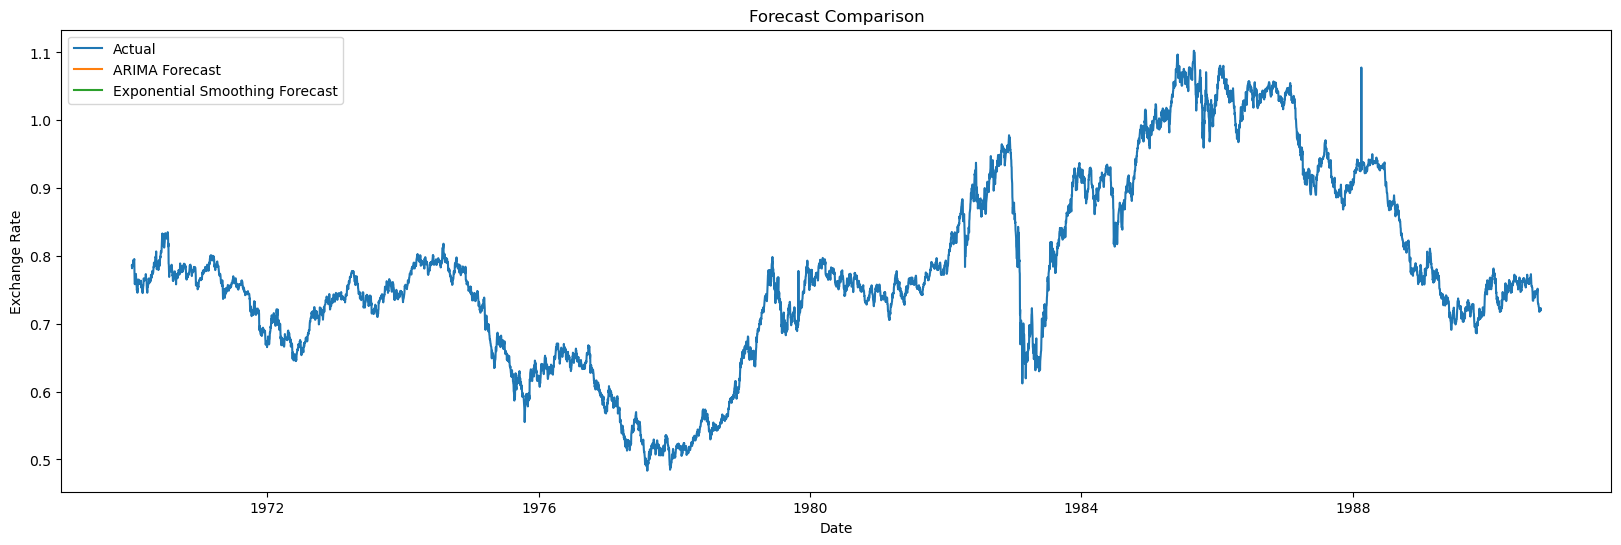

In [48]:
plt.figure(figsize=(20, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(arima_forecast_series, label='ARIMA Forecast')
plt.plot(es_forecast_series, label='Exponential Smoothing Forecast')
plt.title('Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [19]:
# Compute Error Metrics
test_size = 30
train, test = df['Ex_rate'][:-test_size], df['Ex_rate'][-test_size:]


In [20]:
# ARIMA forecast error metrics
arima_forecast_values = arima_result.get_forecast(steps=test_size).predicted_mean
arima_mae = mean_absolute_error(test, arima_forecast_values)
arima_rmse = mean_squared_error(test, arima_forecast_values, squared=False)

# Exponential Smoothing forecast error metrics
es_forecast_values = es_result.forecast(steps=test_size)
es_mae = mean_absolute_error(test, es_forecast_values)
es_rmse = mean_squared_error(test, es_forecast_values, squared=False)


In [21]:
print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {es_mae}, RMSE: {es_rmse}")

ARIMA MAE: 0.012645615818798498, RMSE: 0.01677283728655367
Exponential Smoothing MAE: 0.012707429455453357, RMSE: 0.016957814302469364


#### conclusion:
in this assignment we applied forecasting techniches on the rate_exchange data we applied ARIMA model and smooting model .